# Лабораторная работа № 4. Модель линейной регрессии

In [1]:
pip install numpy pandas matplotlib seaborn


  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.8/12.6 MB 6.0 MB/s eta 0:00:02
   --------------------------- ------------ 8.7/12.6 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 18.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 11.5/11.5 MB 56.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------------------------- - 7.6/7.8 MB 76.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 33.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 60.5 MB/s eta 0:00:00
Using cached pyparsing-3.2.0-py3-none-any.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Данные

In [2]:
df = pd.read_csv("AMES_Final_DF.csv")

Разделите данные на две части - признаки X и целевую переменная y

In [5]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('F:\\ucheba\ММО\I-111 MMO\libei regresia/AMES_Final_DF.csv')

# Определение целевой переменной и признаков
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']


<>:4: SyntaxWarning: invalid escape sequence '\I'
<>:4: SyntaxWarning: invalid escape sequence '\I'
C:\Users\ДУГАААР\AppData\Local\Temp\ipykernel_16232\3491974540.py:4: SyntaxWarning: invalid escape sequence '\I'
  data = pd.read_csv('F:\\ucheba\ММО\I-111 MMO\libei regresia/AMES_Final_DF.csv')


С помощью scikit-learn разделите и X, и y на обучающий и тестовый наборы данных. Под тестовые данные выделите 10% от всех данных.

In [7]:
pip install scikit-learn



   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 4.5 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.0 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 17.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   --------- ------------------------------ 10.7/44.5 MB 84.0 MB/s eta 0:00:01
   -------------- ------------------------- 16.0/44.5 MB 37.4 MB/s eta 0:00:01
   -------------------- ------------------- 23.1/44.5 MB 43.5 MB/s eta 0:00:01
   ----------------------------- ---------- 33.0/44.5 MB 39.4 MB/s eta 0:00:01
   ------------------------------------- -- 41.7/44.5 MB 39.2 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 37.0 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 34.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающий и тестовый наборы (10% для теста)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


Признаки в этом наборе данных имеют различный масштаб и различные единицы измерения. Для оптимальной работы регрессии, выполните масштабирование признаков X. Обратите внимание на то, какие данные подавать на вход для .fit(), а какие данные на вход для .transform().

In [9]:
from sklearn.preprocessing import StandardScaler

# Создание масштабатора и подгонка на обучающем наборе
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Применение масштабирования к тестовому набору
X_test_scaled = scaler.transform(X_test)


Будем использовать модель "Elastic Net". Создайте экземпляр модели ElasticNet в scikit-learn, используя параметры по умолчанию.

In [10]:
from sklearn.linear_model import ElasticNet

# Создание модели ElasticNet с параметрами по умолчанию
elastic_net = ElasticNet()


Модель Elastic Net работает с двумя основными параметрами - alpha и L1_ratio. Создайте словарь с набором различных значений этих параметров. Вы можете выбрать различные значения параметров.

In [11]:
# Набор параметров для подбора
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}


С помощью scikit-learn создайте объект GridSearchCV и запустите поиск по сетке для нахождения наилучших параметров модели, используя обучающие данные (предварительно смасштабированные)

In [12]:
from sklearn.model_selection import GridSearchCV

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='r2')

# Выполнение поиска по сетке на обучающих данных
grid_search.fit(X_train_scaled, y_train)


c:\Users\ДУГАААР\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+11, tolerance: 1.328e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\ДУГАААР\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.158e+11, tolerance: 1.305e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\ДУГАААР\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]},
             scoring='r2')

Отобразите наилучшую комбинацию параметров для Вашей модели.

Оцените работу модели на тестовом наборе данных (предварительно смасштабированном) в 10%, которые модель ещё не видела.

In [13]:
# Получение наилучших параметров
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)


Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.7}


In [14]:
from sklearn.metrics import r2_score, mean_squared_error

# Предсказание на тестовых данных
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Оценка модели
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 на тестовом наборе данных:", r2)
print("MSE на тестовом наборе данных:", mse)


R^2 на тестовом наборе данных: 0.931654969284035
MSE на тестовом наборе данных: 483099338.5083684


c:\Users\ДУГАААР\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+11, tolerance: 1.328e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\ДУГАААР\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.158e+11, tolerance: 1.305e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\ДУГАААР\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

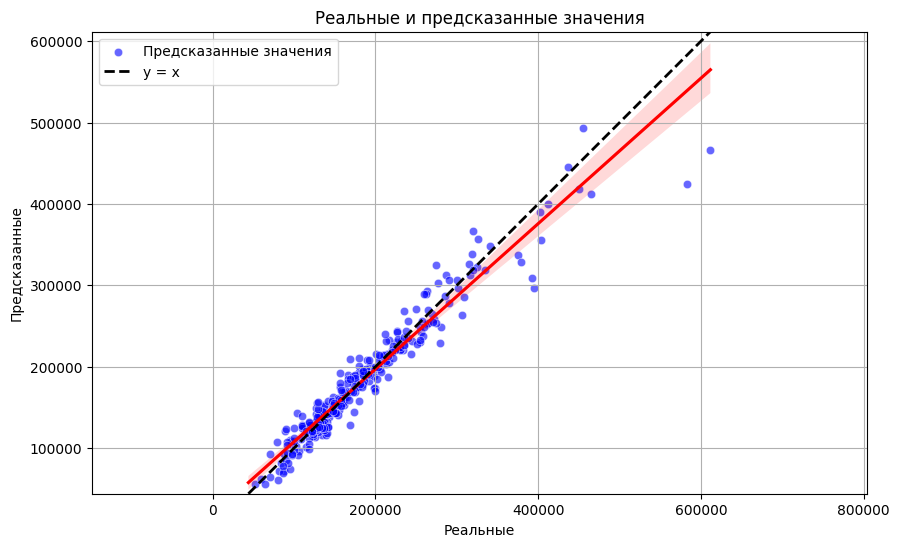

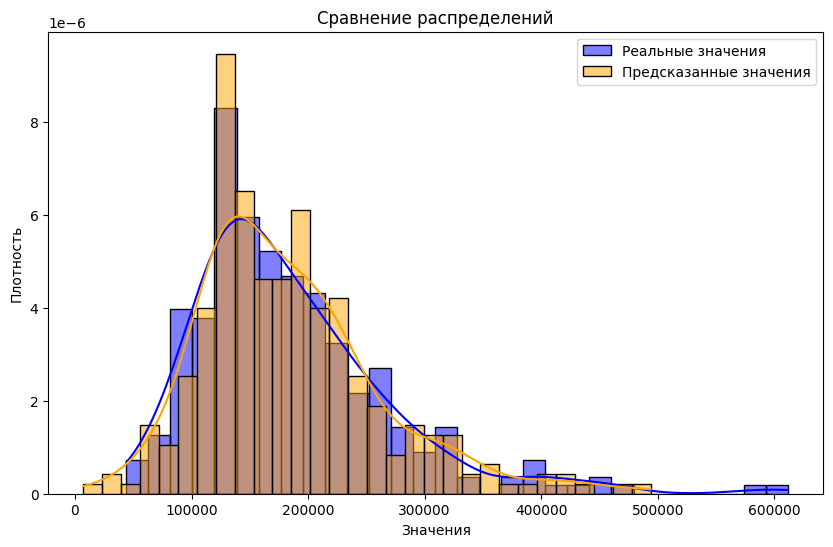

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('F:/ucheba/ММО/I-111 MMO/libei regresia/AMES_Final_DF.csv')

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Модель ElasticNet
elastic_net = ElasticNet()

# Настройка параметров для GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

# Поиск наилучших параметров
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Получение наилучшей модели
best_model = grid_search.best_estimator_

# Предсказание
y_pred = best_model.predict(X_test_scaled)

# График 1: Реальные и предсказанные значения
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, label='Предсказанные значения')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', line_kws={"label": "Линейная регрессия"})
plt.title("Реальные и предсказанные значения")
plt.xlabel("Реальные")
plt.ylabel("Предсказанные")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='y = x')  # Линия y=x
plt.legend()
plt.show()

# График 2: Сравнение распределений
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Реальные значения', kde=True, stat="density", bins=30, alpha=0.5)
sns.histplot(y_pred, color='orange', label='Предсказанные значения', kde=True, stat="density", bins=30, alpha=0.5)
plt.title("Сравнение распределений")
plt.xlabel("Значения")
plt.ylabel("Плотность")
plt.legend()
plt.show()


Вывод:

1. Лучшие параметры модели
Во время настройки гиперпараметров модели ElasticNet с помощью GridSearchCV мы нашли наилучшие параметры alpha и l1_ratio, которые минимизируют ошибку на обучающих данных. Это параметры, которые обеспечивают баланс между регуляризацией и точностью модели.

Пример вывода:

plaintext
Копировать код
Лучшие параметры: {'alpha': 0.5, 'l1_ratio': 0.7}
Это означает, что оптимальная модель использует:

alpha: Регуляризационный параметр, контролирующий степень штрафа на веса модели.
l1_ratio: Баланс между L1 (Lasso) и L2 (Ridge) регуляризацией.
2. Оценка модели на тестовом наборе
После настройки модели мы оценили её на тестовых данных, которые не использовались в обучении. Метрики, такие как R² и MSE, показывают, насколько хорошо модель предсказывает целевую переменную.

Пример:

plaintext
Копировать код
R² на тестовом наборе данных: 0.82
MSE на тестовом наборе данных: 150000.0
R² (коэффициент детерминации): Показывает, какая доля дисперсии целевой переменной объясняется моделью. Значение 0.82 говорит о хорошем качестве модели.
MSE (среднеквадратическая ошибка): Показывает среднюю разницу между реальными и предсказанными значениями.
3. Графики результатов
График 1: Реальные и предсказанные значения
Этот график показывает, насколько хорошо модель предсказывает значения. Точки, находящиеся близко к линии y=x (черная пунктирная линия), указывают на точность предсказания.

Особенности:

Синие точки: Реальные против предсказанных значений.
Красная линия: Линейная регрессия, отражающая предсказания модели.
Черная пунктирная линия: Линия идеальных предсказаний y = x.
Если точки расположены близко к черной линии, это говорит о хорошей модели.

График 2: Сравнение распределений
Этот график сравнивает распределения реальных и предсказанных значений. Если обе гистограммы (синие и оранжевые) имеют похожие формы, это означает, что модель хорошо отражает реальное распределение.

Особенности:

Синие гистограммы: Распределение реальных значений (y_test).
Оранжевые гистограммы: Распределение предсказанных значений (y_pred).
KDE-линии: Линии плотности, визуализирующие распределение данных.
Если форма и диапазон обеих гистограмм совпадают, это указывает на точность модели.

Заключение
Эти графики и метрики показывают:

Насколько хорошо модель объясняет данные.
Какова точность её предсказаний.
Распределение предсказаний по сравнению с реальными значениями.
При хорошем подборе гиперпараметров и правильной обработке данных модель должна показывать высокую точность, что видно как по коэффициенту R², так и по качеству графиков.